In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [36]:
df = pd.read_csv("/content/LoanExport.csv")
df.head(10)

<ipython-input-36-83b8fae75730>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/LoanExport.csv")


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


- `CreditScore`: Borrower's credit score at the time of loan origination.
- `FirstPaymentDate`: Date of the first scheduled mortgage payment.
- `FirstTimeHomebuyer`: Indicates if the borrower is a first-time homebuyer.
- `MaturityDate`: Date when the loan is scheduled to be fully paid off.
- `MSA`: Metropolitan Statistical Area code of the property.
- `MIP`: Mortgage Insurance Premium, if applicable.
- `Units`: Number of units in the property (e.g., single-family, duplex, etc.).
- `Occupancy`: Occupancy status of the property (e.g., owner-occupied, investment, etc.).
- `OCLTV`: Original Combined Loan-to-Value ratio, which considers all loans on the property.
- `DTI`: Debt-to-Income ratio of the borrower.
- `OrigUPB`: Original unpaid principal balance of the loan.
- `LTV`: Loan-to-Value ratio at the time of loan origination.
- `OrigInterestRate`: Original interest rate of the loan.
- `Channel`: Origination channel (e.g., retail, broker, correspondent, etc.).
- `PPM`: Indicates if the loan has a prepayment penalty.
- `ProductType`: Type of mortgage product (e.g., fixed-rate, adjustable-rate, etc.).
- `PropertyState`: State code where the property is located.
- `PropertyType`: Type of property (e.g., single-family, condominium, etc.).
- `PostalCode`: Zip code of the property.
- `LoanSeqNum`: Unique loan sequence number.
- `LoanPurpose`: Purpose of the loan (e.g., purchase, refinance, etc.).
- `OrigLoanTerm`: Original term of the loan in months.
- `NumBorrowers`: Number of borrowers on the loan.
- `SellerName`: Name of the entity that sold the loan to Freddie Mac.
- `ServicerName`: Name of the entity servicing the loan.
- `EverDelinquent`: Indicates if the borrower has ever been delinquent on the loan.
- `MonthsDelinquent`: Number of months the borrower has been delinquent, if applicable.
- `MonthsInRepayment`: Number of months the borrower has been in repayment.

In [37]:
df.shape

(291451, 28)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [39]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [40]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


##Handle Missing Values

In [41]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [42]:
df.dropna()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


In [43]:
#NaN values percentage 
round((291451-266457)/291451*100)

9

Since the `SellerName` column has less relation with Prepayment Risk, We can drop this column.

In [44]:
df.drop(columns=['SellerName'], inplace=True)

In [45]:
cols = df.columns

In [46]:
for col in cols:
  if (df[col]=='X').sum() != 0:
    print(f"{col} - {(df[col]=='X').sum()}")

FirstTimeHomebuyer - 78015
MSA - 39100
PPM - 5405
PropertyType - 22
PostalCode - 6
NumBorrowers - 339


In [47]:
for col in cols:
  if (df[col]=='-999').sum() != 0:
    print(f"{col} - {(df[col]=='-999').sum()}")

In [48]:
#Drop the unnecessary column
df.drop('MSA', axis=1, inplace=True)
# Fill incorrect values with the mean of the column (numeric data)
rep_num = {'X': df['NumBorrowers'].mode()[0]}
df['NumBorrowers'] = df['NumBorrowers'].replace(rep_num)

# Fill incorrect values with the mode of the column (categorical data)
rep_first = {'X': df['FirstTimeHomebuyer'].mode()[0]}
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace(rep_first)
rep_ppm = {'X': df['PPM'].mode()[0]}
df['PPM'] = df['PPM'].replace(rep_ppm)
rep_ptype = {'X': df['PropertyType'].mode()[0]}
df['PropertyType'] = df['PropertyType'].replace(rep_ptype)
rep_pcode = {'X': df['PostalCode'].mode()[0]}
df['PostalCode'] = df['PostalCode'].replace(rep_pcode)


In [49]:
from datetime import datetime

# Custom function to convert the number to a datetime object
def convert_to_date(num):
    date_str = str(num) + "01"
    return datetime.strptime(date_str, "%Y%m%d")


# Convert the 'YYYY-MM-DD' strings to datetime objects
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(convert_to_date)
df['MaturityDate'] = df['MaturityDate'].apply(convert_to_date)

In [50]:
df.head(10)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,25,1,O,89,27,117000,...,SF,60400,F199Q1268030,P,360,2,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,0,1,O,73,17,109000,...,SF,80200,F199Q1015092,N,360,1,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,0,1,O,75,16,88000,...,SF,66000,F199Q1266886,N,360,2,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,0,1,O,76,14,160000,...,SF,90700,F199Q1178167,N,360,2,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,0,1,O,78,18,109000,...,SF,7600,F199Q1178517,N,360,2,GMACMTGECORP,0,0,54
5,0,1999-02-01,N,2029-01-01,25,1,O,89,40,207000,...,SF,80400,F199Q1224802,N,360,2,Other servicers,0,0,42
6,0,1999-02-01,N,2029-01-01,25,1,O,90,21,111000,...,SF,53100,F199Q1291436,P,360,1,Other servicers,0,0,44
7,0,1999-02-01,N,2029-01-01,0,1,O,72,20,97000,...,SF,32800,F199Q1001824,N,360,1,WELLSFARGOBANKNA,1,3,145
8,0,1999-02-01,Y,2027-10-01,30,1,O,95,38,55000,...,SF,6400,F199Q1079744,P,345,1,Other servicers,0,0,64
9,0,1999-02-01,Y,2029-01-01,30,1,O,95,27,35000,...,SF,67000,F199Q1196318,P,360,1,WELLSFARGOBANKNA,1,104,212


##Outliers Treatment

In [51]:
# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (column < lower_bound) | (column > upper_bound)

# Loop through each column and find columns with outliers
columns_with_outliers = []
for column_name in df.columns:
    if np.issubdtype(df[column_name].dtype, np.number):
        if detect_outliers(df[column_name]).any():
            columns_with_outliers.append(column_name)


print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['CreditScore', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']


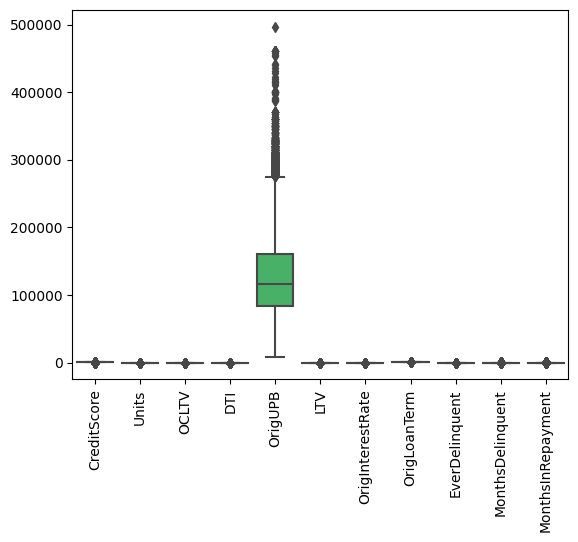

In [52]:
# Select the columns to display as box plots
selected_data = df[columns_with_outliers]

# Create a box plot for outliers
sns.boxplot(data=selected_data)
plt.xticks(rotation=90)
plt.show()

####Cap/Floor the outliers:

In [53]:
#Handle outliers
for column in columns_with_outliers:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower_bound, upper_bound)

##Label Encoding

In [54]:
#Dropping unnecessary columns
df.drop(columns=['LoanSeqNum', 'PostalCode', 'ServicerName', 'ProductType'], inplace=True)

In [55]:
#sort numeric and categorical values
num_cl = df.select_dtypes('number').columns.to_list()
cat_cl = df.select_dtypes('object').columns.to_list()

cat_cl

['FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PPM',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'NumBorrowers']

In [56]:
#value types in a single column:
for i in cat_cl:
  print(f"{i} : {len(df[i].value_counts())}")

FirstTimeHomebuyer : 2
Occupancy : 3
Channel : 4
PPM : 2
PropertyState : 53
PropertyType : 6
LoanPurpose : 3
NumBorrowers : 2


In [57]:
# Label encoding:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in cat_cl:
  df[column] = label_encoder.fit_transform(df[column])

df.head(10)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0.0,1999-02-01,0,2029-01-01,25,1,1,89.0,27,106.5,...,3,0,15,5,2,106.5,1,0,0.0,52.0
1,0.0,1999-02-01,0,2029-01-01,0,1,1,73.0,17,106.5,...,2,0,5,5,1,106.5,0,0,0.0,106.5
2,0.0,1999-02-01,0,2029-01-01,0,1,1,75.0,16,106.5,...,3,0,17,5,1,106.5,1,0,0.0,67.0
3,0.0,1999-02-01,0,2029-01-01,0,1,1,76.0,14,106.5,...,2,0,4,5,1,106.5,1,0,0.0,35.0
4,0.0,1999-02-01,0,2029-01-01,0,1,1,78.0,18,106.5,...,2,0,32,5,1,106.5,1,0,0.0,54.0
5,0.0,1999-02-01,0,2029-01-01,25,1,1,89.0,40,106.5,...,3,0,5,5,1,106.5,1,0,0.0,42.0
6,0.0,1999-02-01,0,2029-01-01,25,1,1,90.0,21,106.5,...,3,0,50,5,2,106.5,0,0,0.0,44.0
7,0.0,1999-02-01,0,2029-01-01,0,1,1,72.0,20,106.5,...,2,0,9,5,1,106.5,0,1,3.0,106.5
8,0.0,1999-02-01,1,2027-10-01,30,1,1,95.0,38,106.5,...,2,0,6,5,2,106.5,0,0,0.0,64.0
9,0.0,1999-02-01,1,2029-01-01,30,1,1,95.0,27,106.5,...,3,0,17,5,2,106.5,0,1,104.0,106.5


##Univariate Analysis

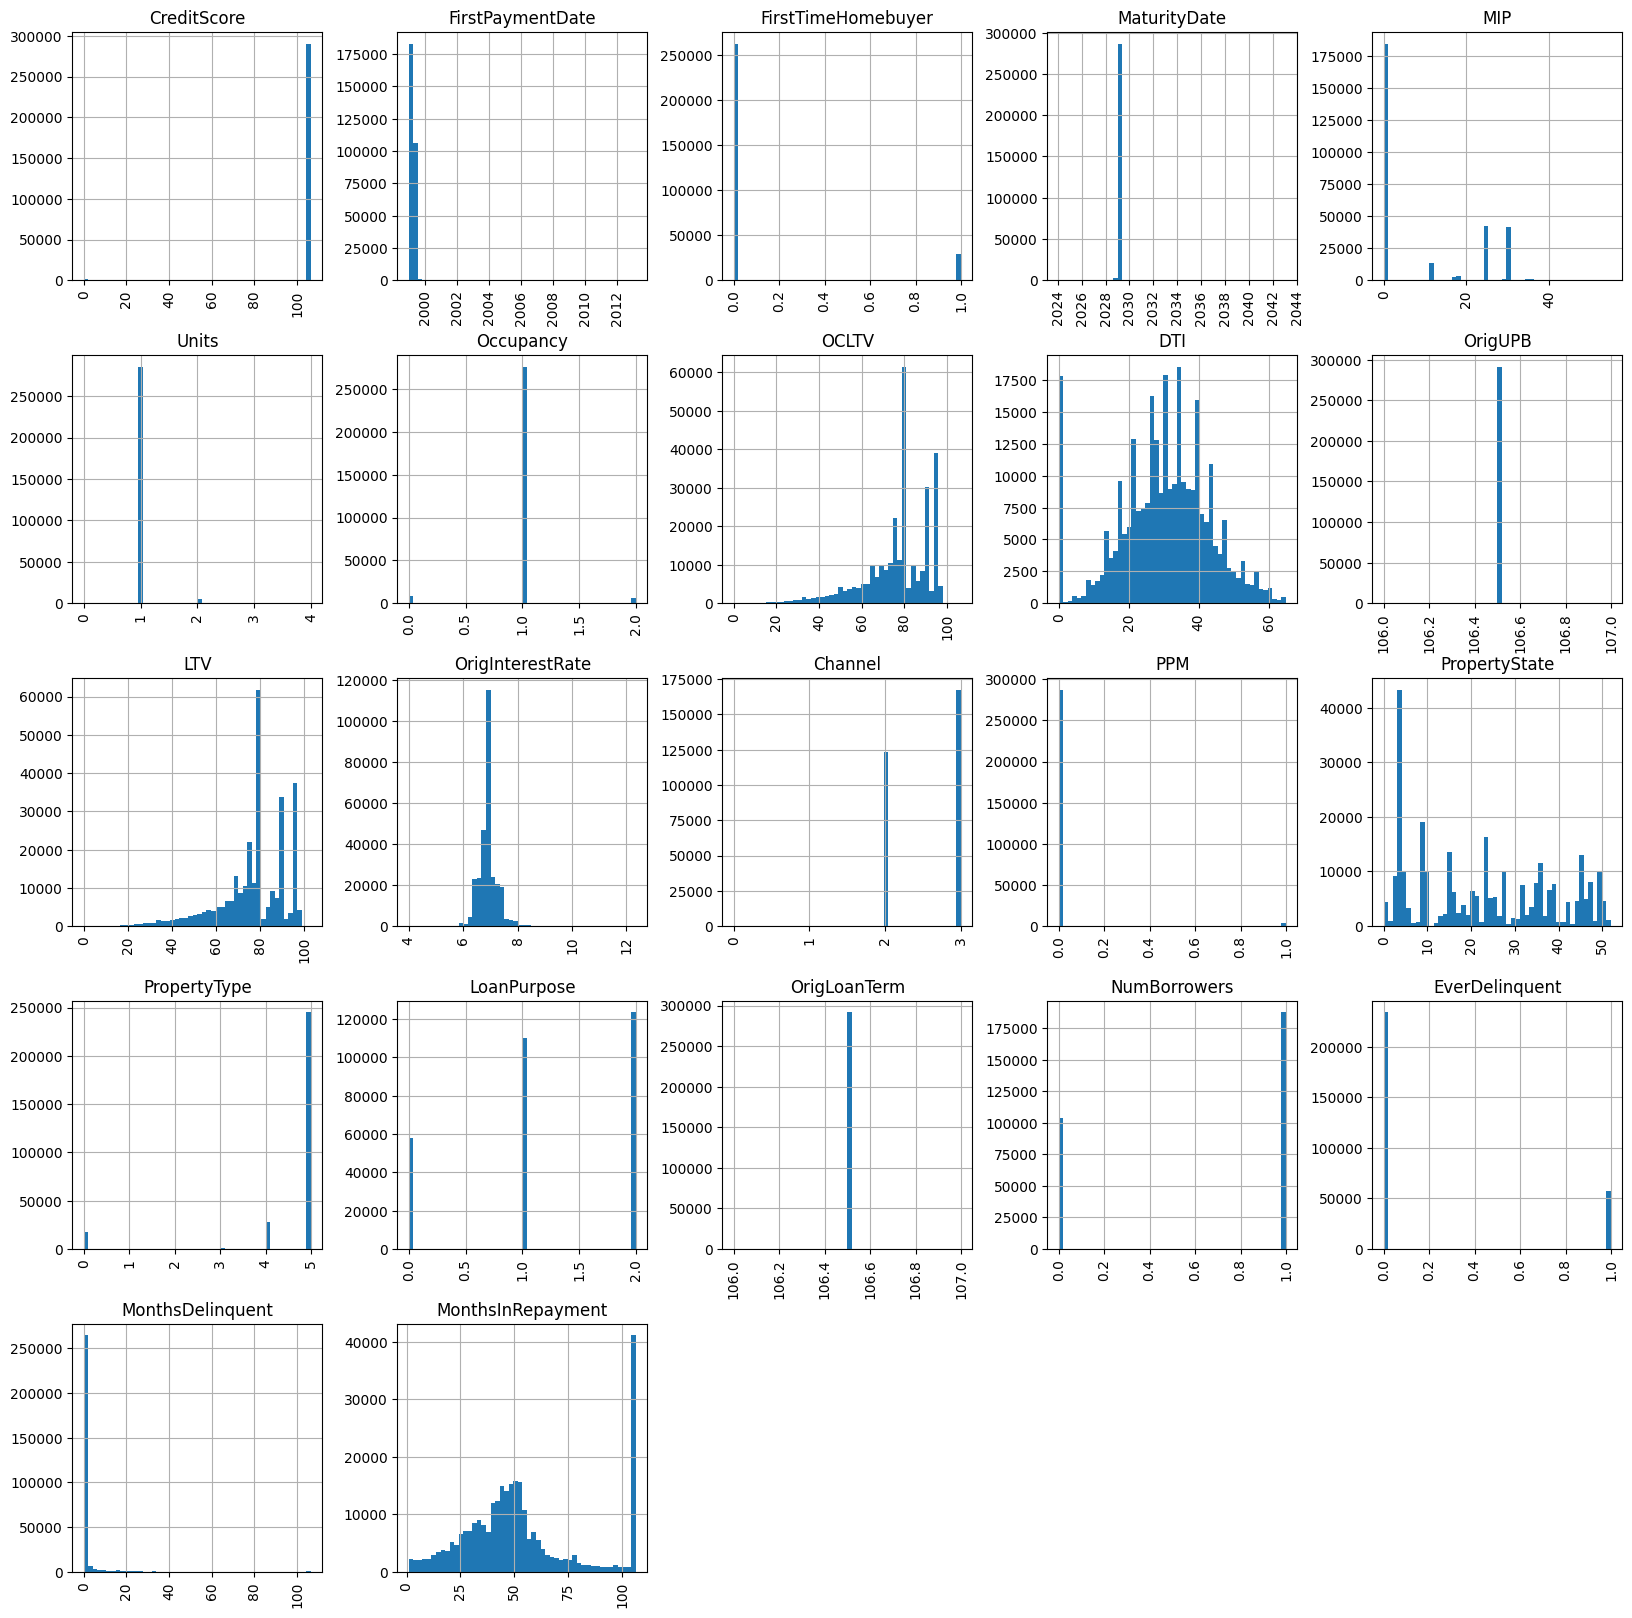

In [58]:
# Summary statistics
df.describe()

# Histograms for each variable in df
df.hist(bins=50, figsize=(20,20), xrot = 90)
plt.show()

In [59]:
df.corrwith(df['EverDelinquent']).abs().sort_values(ascending=False)

<ipython-input-59-6eee711beaff>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['EverDelinquent']).abs().sort_values(ascending=False)


EverDelinquent        1.000000
MonthsDelinquent      0.434456
MonthsInRepayment     0.224775
NumBorrowers          0.072126
LTV                   0.065735
OCLTV                 0.065528
DTI                   0.062109
OrigInterestRate      0.060418
MIP                   0.059993
PropertyType          0.026446
PropertyState         0.025433
Channel               0.022736
LoanPurpose           0.021690
Occupancy             0.012291
PPM                   0.012168
CreditScore           0.012128
Units                 0.010163
FirstTimeHomebuyer    0.002109
OrigUPB                    NaN
OrigLoanTerm               NaN
dtype: float64

##Bivariate Analysis

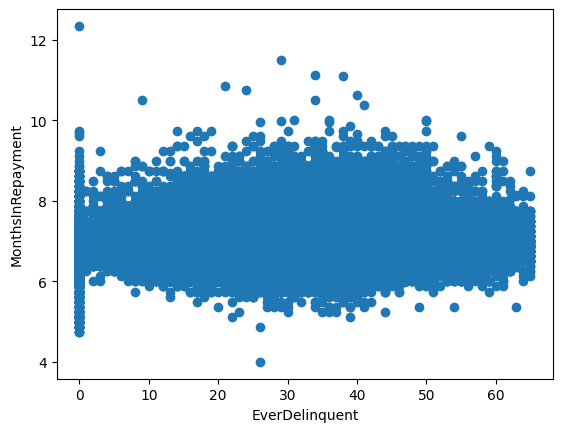

<ipython-input-60-c968789c324a>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

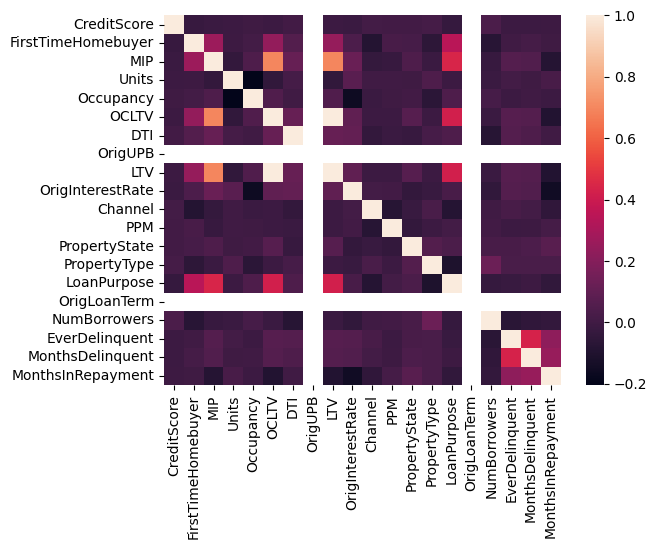

In [60]:
# Scatter plot between two variables
plt.scatter(df['DTI'], df['OrigInterestRate'])
plt.xlabel('EverDelinquent')
plt.ylabel('MonthsInRepayment')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix)


##Multivariate Analysis

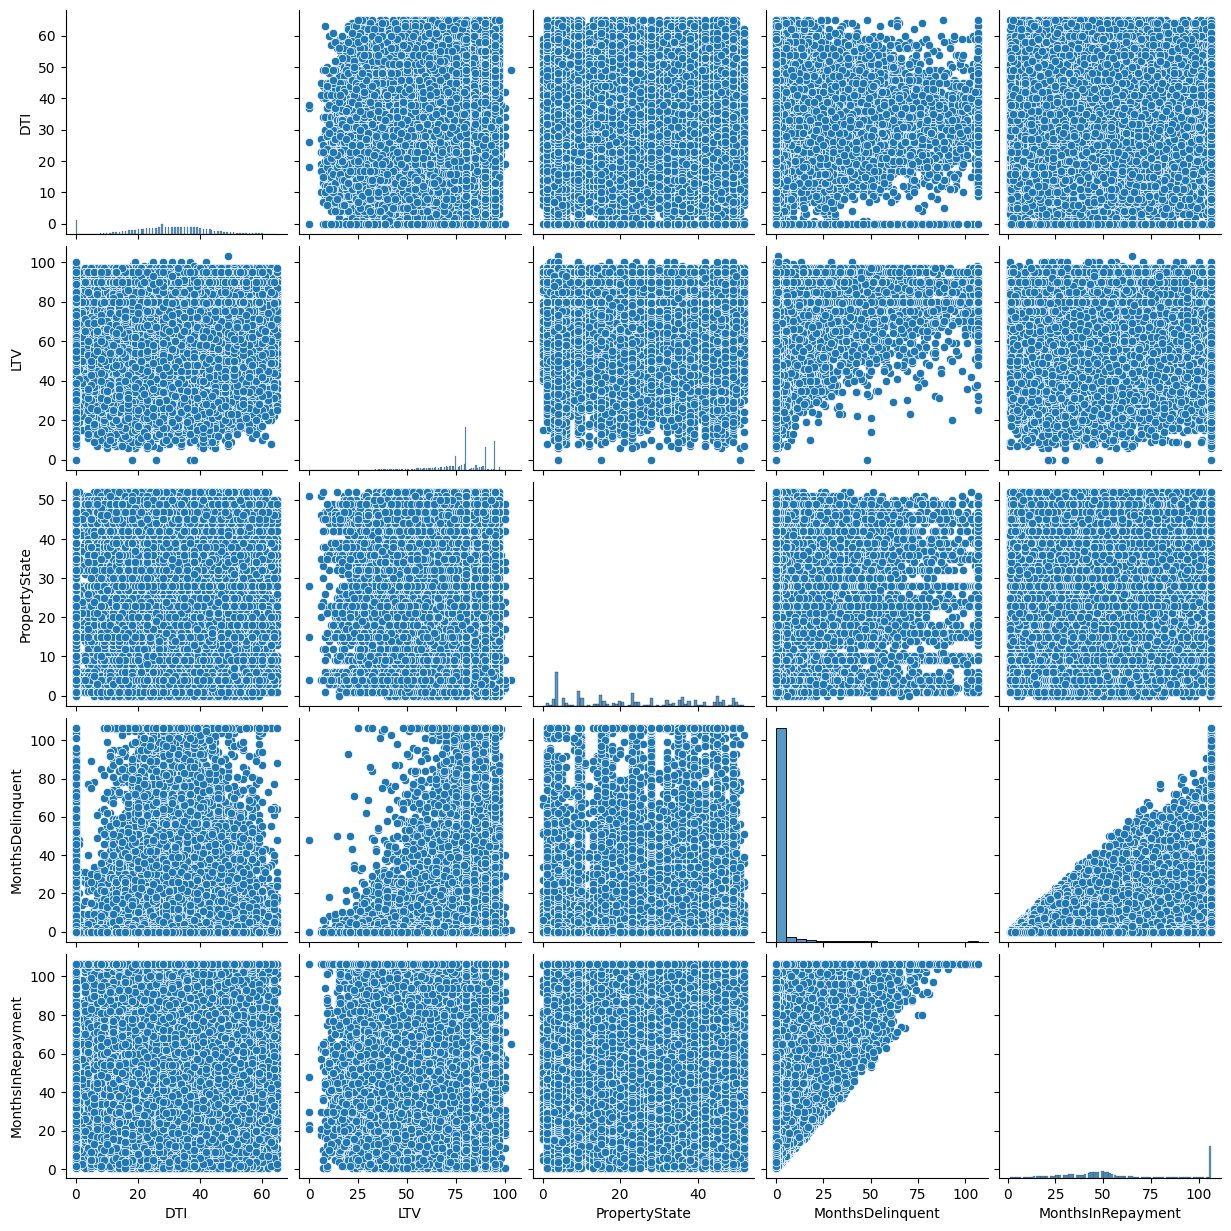

In [61]:
# Pairplot of select variables
cols = ['FirstPaymentDate', 'DTI', 'LTV', 'PropertyState', 'MonthsDelinquent', 'MonthsInRepayment']
sns.pairplot(df[cols])

##Feature Extraction

Calculate the remaining loan term at the time of data collection. This can be useful to understand the borrower's position in their repayment schedule.

In [62]:
# Calculate remaining loan term (in months)
df['RemainingLoanTerm'] = df['OrigLoanTerm'] - df['MonthsInRepayment']


Calculate the remaining unpaid principal balance (UPB) at the time of data collection. This can help to determine how much the borrower still needs to pay off

In [63]:
# Calculate remaining UPB at the time of data collection
df['RemainingUPB'] = df['OrigUPB'] * (1 - (df['MonthsInRepayment'] / df['OrigLoanTerm']))


Create a feature that indicates whether the borrower had a high debt-to-income (DTI) ratio at the time of loan origination. A high DTI ratio may indicate a higher risk borrower

In [64]:
# Create a binary feature for high DTI ratio (e.g., DTI > 43%)
df['HighDTI'] = (df['DTI'] > 43).astype(int)


Create a feature that indicates whether the loan has a high loan-to-value (LTV) ratio at the time of loan origination. A high LTV ratio can also indicate higher risk

In [65]:
# Create a binary feature for high LTV ratio (e.g., LTV > 80%)
df['HighLTV'] = (df['LTV'] > 80).astype(int)


Create a feature that indicates if the property is a single-family home, which might affect the borrower's likelihood of prepayment or delinquency

In [66]:
# Create a binary feature for single-family homes
df['IsSingleFamily'] = (df['PropertyType'] == 'SingleFamily').astype(int)


##Modeling 1

Create a binary classification model to predict loan eligibility using the EverDelinquent column as the target variable. This model will help you understand the factors affecting eligibility and predict whether a new applicant is likely to be delinquent.

In [68]:
# Extract features and target variable
features = df.drop(columns=['EverDelinquent', 'FirstPaymentDate', 'MaturityDate'])
target = df['EverDelinquent']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train and evaluate a binary classification model (e.g., logistic regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
